# PROJECT-DISTRACTED DRIVER DETECTION
##### TOPICS: TENSORFLOW, KERAS, CNN
##### BY: ADITI DONA

In [23]:
import os
import random
import numpy as np
from PIL import Image,ImageOps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image 
from tensorflow.keras import optimizers
import pickle


## Loading the Images
## Preprocessing 
##### --> convert each image to grayscale
##### --> Resize each image to (240,240) to speed up processing
##### --> Convert to image array

In [24]:
x=[]
y=[]
train_dir='../input/state-farm-distracted-driver-detection/imgs/train'
labels=os.listdir(train_dir)
for label in range(len(labels)):
    images=os.listdir(train_dir+'/c'+str(label))
    for im in images:
        image=Image.open(train_dir+'/c'+str(label)+'/'+im)
        image=ImageOps.grayscale(image)
        image=image.resize((240,240))
        image=np.array(image)
        x.append(image)
        y.append(label)
    print('---Images of label:',label,'read---')

---Images of label: 0 read---
---Images of label: 1 read---
---Images of label: 2 read---
---Images of label: 3 read---
---Images of label: 4 read---
---Images of label: 5 read---
---Images of label: 6 read---
---Images of label: 7 read---
---Images of label: 8 read---
---Images of label: 9 read---


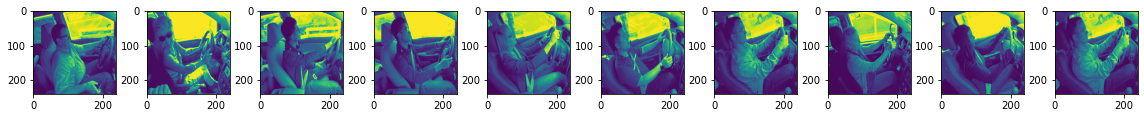

In [25]:
fig=plt.figure(figsize=(20,18))
for i in range(10):
    ax=fig.add_subplot(10,10,i+1)
    ax.imshow(x[i]) 

In [4]:
# Converting to numpy array
x=np.array(x)
y=np.array(y)
print(x.shape,y.shape)

(22424, 240, 240) (22424,)


In [5]:
# reshaping
x=x.reshape(-1,240,240,1)
print(x.shape,y.shape)

(22424, 240, 240, 1) (22424,)


## Splitting into train and test data
##### ---> 80% Train
##### ---> 20% Validation 

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

## One-hot encoding

In [7]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

## Building the Cnn Model
##### ---> Sequential model
##### ---> Convulational layers-(units=34 & 64 , activation='relu', k=3, input_dimension=(240,240,1), padding='same')
##### ---> MaxPooling-(k=2)
##### ---> Dropout- excluding 25% of the data points in CNN1 & CNN2 and 50% of the data points in Dense layer to prevent overfit
##### ---> Output Layer-(activation='Softmax')


In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(240,240,1),padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

## Compiling the model
##### ---> Optimizer used = SGD optmizer with learning rate 0.001
##### ---> loss function = crossentropy
##### ---> metric = accuracy


In [9]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.SGD(lr = 0.001),metrics=['accuracy'])

## Training the model
##### ---> epoch=10

In [10]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
561/561 [==============================] - 17s 31ms/step - loss: 2.5131 - accuracy: 0.1666 - val_loss: 2.0241 - val_accuracy: 0.4640
Epoch 2/10
561/561 [==============================] - 17s 30ms/step - loss: 1.5974 - accuracy: 0.4414 - val_loss: 0.9380 - val_accuracy: 0.7367
Epoch 3/10
561/561 [==============================] - 17s 30ms/step - loss: 0.9024 - accuracy: 0.6942 - val_loss: 0.3776 - val_accuracy: 0.9235
Epoch 4/10
561/561 [==============================] - 17s 30ms/step - loss: 0.5673 - accuracy: 0.8102 - val_loss: 0.2099 - val_accuracy: 0.9530
Epoch 5/10
561/561 [==============================] - 17s 30ms/step - loss: 0.3942 - accuracy: 0.8728 - val_loss: 0.1143 - val_accuracy: 0.9728
Epoch 6/10
561/561 [==============================] - 17s 30ms/step - loss: 0.2985 - accuracy: 0.9007 - val_loss: 0.0798 - val_accuracy: 0.9822
Epoch 7/10
561/561 [==============================] - 17s 30ms/step - loss: 0.2352 - accuracy: 0.9240 - val_loss: 0.0589 - val_accuracy:

## Summary of Accuracy w.r.t Epoch

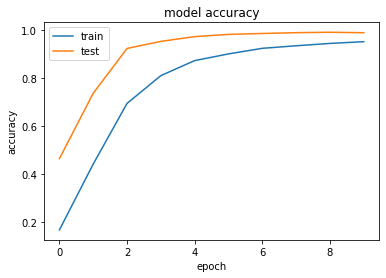

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

##### Hence model has not overfitted because the test accuracy is always more than train accuracy

## Summarize of Loss w.r.t Epoch

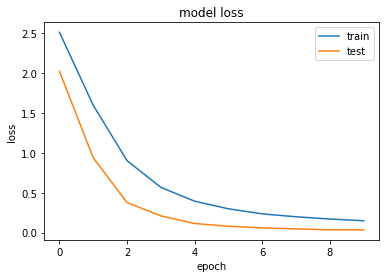

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

#### Hence model has not overfitted because the test loss is always less than train loss

## Evaluation on Test Dataset

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03399389982223511
Test accuracy: 0.98907470703125


## Accuracy on Test Data :  98.9074

## Saving the model

In [14]:
model.save('driver_model.h5')

## Loading the model to verify results

In [15]:
reconstructed_model = tf.keras.models.load_model("driver_model.h5")

In [18]:
classes = {"0" : "safe driving",
"1": "texting - right",
"2": "talking on the phone - right",
"3": "texting - left",
"4": "talking on the phone - left",
"5": "operating the radio",
"6": "drinking",
"7": "reaching behind",
"8": "hair and makeup",
"9": "talking to passenger"}
test=x_test[0]
test=test.reshape(-1,240,240,1)
pred1=model.predict(test)[0]
pred2=reconstructed_model.predict(test)[0]
label1=np.argmax(pred1)
label2=np.argmax(pred2)
print("Result from trained model:",classes[str(label1)])
print("Result from loaded model:",classes[str(label2)])

Result from trained model: safe driving
Result from loaded model: safe driving


### Hence Same Results